In [3]:
library(data.table)
library(stringr)
library(pheatmap)
library(ape)
library(ggplot2)
library(Rtsne)
library(sva)
library(VennDiagram)
library(readxl)
library(energy)
library(MASS)
library(quantreg)
library(limma)
library(Glimma)
library(edgeR)
library(RColorBrewer)
library(minerva)
library(dbscan)
library(amap)
library(NbClust)
library(apeglm)
library(gplots)
library(colorspace)
library(dendextend)
library(data.table)
library(topGO)
library(treemap)
library(factoextra)
library(ggrepel)
library(dplyr)
library(plyr)
library(cowplot)
library(patchwork)
library(xlsx)
library(variancePartition)
library(ggthemes)
library(FactoMineR)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel
Loading required package: grid
Loading required package: futile.logger

Attaching package: ‘futile.logger’

The following object is masked from ‘package:mgcv’:

    scat


Attaching package: ‘VennDiagram’

The following object is masked from ‘package:ape’:

    rotate


Attaching package: ‘MASS’

The following object is masked from ‘package:genefilter’:

    area

Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github pag

In [4]:
color_AD <- "#FF3300"
color_ND <- "blue"
color_CHC_H <- color_ND
color_CHC_M <- "#FFCC00"
color_CHC_L <- "#FF3300"
font_size <- 10
font_size_add <- 2

circle_size_1 <- 2
circle_size_2 <- 3

In [5]:
setwd("~/ownCloud/Meng/")

In [4]:
load("100_plus_project/Metadata/metadata_imp_20230223.Rdata")
metadata <- metadata_imp

In [5]:
metadata

,nbb,autopsy,sex,age,weight,GROUP,pmd,braak,amyloid,apoe,filenames,fBraak,cBraak,O_amyloid,apoe_OR,pmd_numeric
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
121,2016-020,S16/020,F,102,955,CHC,06:10,2,1,23,20190325_121_S16_020_CHC_011,2,1,A,0.6,6.166667
125,2016-044,S16/044,F,102,1015,CHC,05:17,3,3,33,20190325_125_S16_044_CHC_007,3,2,C,1.0,5.283333
127,2016-094,S16/094,F,104,1045,CHC,07:55,3,1,33,20190325_127_S16_094_CHC_004,3,2,A,1.0,7.916667
16,2004-011,04/037,F,84,1017,AD,05:55,5,3,33,20190325_16_04_037_AD_008,5,3,C,1.0,5.916667
182,2010-101,S10/292,M,64,1233,AD,04:35,6,3,32,20190325_183_S10_292_AD_010,6,3,C,0.6,4.583333
193,2002-024,S02/055,F,75,1153,ND,05:30,1,3,42,20190325_194_S02_055_ND_005,1,1,C,2.6,5.500000
31,2001-081,01/184,F,93,1010,AD,05:05,5,3,33,20190325_31_01_184_AD_006,5,3,C,1.0,5.083333
57,1997-091,S97/235,F,85,1000,AD,02:00,5,3,43,20190325_57_S97_235_AD_003,5,3,C,3.2,2.000000
77,2011-072,S11/072,F,76,1072,ND,07:15,2,0,33,20190325_77_S11_072_ND_012,2,1,O,1.0,7.250000


In [6]:
names(metadata)

[1] "nbb"         "autopsy"     "sex"         "age"         "weight"     
 [6] "GROUP"       "pmd"         "braak"       "amyloid"     "apoe"       
[11] "filenames"   "fBraak"      "cBraak"      "O_amyloid"   "apoe_OR"    
[16] "pmd_numeric"

In [7]:
clinical_data <- read_excel("100_plus_project/Metadata/Andrea Box 2_2016_08_30_Project 955_100plusControls_toprint - 20240319.xlsx",
                            sheet=4, col_names=TRUE, na="NA")

New names:
• `autopsy` -> `autopsy...3`
• `autopsy` -> `autopsy...4`

In [8]:
clinical_data

nbb with colour code,nbb,autopsy...3,autopsy...4,CR3/43,AT8,IC16,cohort,sex,age,⋯,specific,ocode,storage,Thal Stage Abeta,Braakstage NFTs,MMSE,freezer,Comorbidities2,Comorbidities,Clincal info
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
2014-029,S14/029,NA,NA,0.77450000,0.007,0.022000000,NA,f,78,⋯,right,N2,plastic bag -80°C,NA,NA,NA,1908H,liver cirrhosis,Liver cirrhosis ascites and anuria,"Cause of death: Liver cirrhosis ascites and anuria Lawyer/Judge, Patient smoked for24 years, drank two units alcohol per day. CLINICAL COURSE Until the age of 83 years patient was known with high blood pressure and relapsing respiratory tract infections. In 2005 he was diagnosed with diabetes mellitus type II. The following years were characterized by dysregulation of the hypertension and relapsing respiratory tract infections. From the age of 88 years the heart function deteriorated, patient had renal dysfunction and in 2013 he was hospitalized with heart failure and ascites by liver cirrhosis Thal fase 3; tauopathy astroglia (ARTAG); A2B2C1; caa type 1 but no other Neuropathological Info"
2013-016,S13/016,NA,NA,0.28075000,0.092,0.097666667,NA,m,83,⋯,NA,N2,plastic bag -80°C,NA,NA,NA,1836G,heart failure,Heart failure,"Cause of death: Heart failure 2013: In February the patient reported forgetfulness. Ciprofloxacin was prescribed. In March the general practitioner observed good cognitive condition. Conclusion: Brain with senile involutive cortical changes (Thal stage 3 of 5 for amyloid beta and Braak stage 2 of 6 for tauopathy). Additionally slight primary, age related tauopathy (tau in glial cells). In addition, slight alpha-synucleinopathy is found (Braak stage 1 of 6 for Lewy body disease). All this did not have any clinical consequences yet. Furthermore cerebral amyloid angiopathy type 1 (including capillary amyloid angiopathy). As incidental finding a small cavernous hemangioma is found in the subcortical white matter. In the white matter signs of hypertension and some iron pigment macrophages around vessels are found. In the cortex a few old, recent and beginning microinfarctions are found (fitting microthrombi)."
1998-089,S98/186,NA,NA,4.26700000,0.190,0.613000000,NA,f,90,⋯,area 21,N2,plastic bag -80°C,NA,NA,NA,12E4,Haemorrhagic shock secondary to a complicated ruptured abdominal aorta aneurysm,Haemorrhagic shock secondary to a complicated ruptured abdominal aorta aneurysm,Cause of death: Haemorrhagic shock secondary to a complicated ruptured abdominal aorta aneurysm. Severe generalized atherosclerosis. slight senile involutive cortical changes (Braak stage 1).
2001-006,S01/024,NA,NA,0.15300000,0.115,2.655250000,NA,f,91,⋯,NA,N2,plastic bag -80°C,NA,NA,NA,13K7,sudden death,Sudden death; suspected myocard infarction,"Cause of death: Sudden death; suspected myocard infarction. May 1990 Her cognition was very well but physically she needed help which she found very difficult to accept. COGNITIVE SITUATION in last two months: good. CONCLUSION: 1) with the exception of slight senile involutive cortical changes (Braak stage for tangles = 1, for amyloid = B), there are no abnormalities. 2) lipoma (cauda equina)."
2004-026,S04/074,NA,NA,0.79875000,0.030,6.582200000,NA,f,91,⋯,NA,N2,plastic bag -80°C,NA,NA,NA,15F8,Unknown,Unknown,"1982 May: The patient was seen pre-operatively by an internist. Examination revealed she was depressive. Further psychiatric examination revealed no abnormalities. No further information could be retrieved from the medical information about the character or duration of this mentioned depressive state. 1990 May: The patient had fallen of the stairs at home and prior she collapsed on the street without prodromi and e causa ignota. The ECG excluded the probability of an Adams-Stokes attack. 2000 She appeared to be a vital woman who was very capable of doing her activities of daily living. COGNITIVE STATE (during the last two months) -Linguistic c

In [9]:
unique(clinical_data$`nbb with colour code`) %>% length()

[1] 130

In [10]:
length(clinical_data$`nbb with colour code` %in% metadata_imp$nbb)

[1] 130

In [11]:
High_quality_protein_intensity_matrix <- read.table('R_workstation/100_plus_proteomic_DATA/High_quality_protein_intensity_matrix.tsv', header =TRUE,
                                                    stringsAsFactors=F, sep = "\t")
dim(High_quality_protein_intensity_matrix)

[1] 3448  191

In [12]:
summary(metadata)

     nbb              autopsy              sex                 age       
 Length:190         Length:190         Length:190         Min.   : 50.0  
 Class :character   Class :character   Class :character   1st Qu.: 78.0  
 Mode  :character   Mode  :character   Mode  :character   Median : 89.0  
                                                          Mean   : 86.8  
                                                          3rd Qu.:100.0  
                                                          Max.   :111.0  
    weight             GROUP               pmd                braak      
 Length:190         Length:190         Length:190         Min.   :0.000  
 Class :character   Class :character   Class :character   1st Qu.:2.000  
 Mode  :character   Mode  :character   Mode  :character   Median :4.000  
                                                          Mean   :3.611  
                                                          3rd Qu.:5.000  
                                      

In [13]:
table(metadata$amyloid, metadata$GROUP)

   
    AD CHC ND
  0  0   3 13
  1  0  18 23
  2  7  14 15
  3 81  14  2

In [14]:
cal_sample_batch_index <- function(sample_names){
    sample_index <- apply(as.data.frame(sample_names), 1, str_sub, -3)
    for (i in 1:length(sample_index)){
        sample_index[i] <- gsub("_", "0", sample_index[i])
    }
    sample_index <- as.numeric(sample_index)
    sample_index <- (sample_index - 1) %/% 8
    extra_batch <- max(sample_index, na.rm=TRUE) + 1
    sample_index[is.na(sample_index)] <- extra_batch
    return(sample_index)
}

protein_intensity_combat <- ComBat(dat=log2(as.matrix(High_quality_protein_intensity_matrix[,-1])), 
                                     batch=cal_sample_batch_index(metadata$filenames), mod=NULL, par.prior=TRUE, prior.plots=FALSE)
rownames(protein_intensity_combat) <- High_quality_protein_intensity_matrix$protein

Warning message in cal_sample_batch_index(metadata$filenames):
“NAs introduced by coercion”Found29batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [15]:
cal_ANOVA_test <- function(variable, group){
    pdata <- data.frame(variable=as.numeric(drop(t(variable))), group=factor(group))
    test_anova <- oneway.test(variable~group, data=pdata, var.equal=F)
    return(test_anova$p.value)
}

lm_sig_test <- function(re_variable, exp_variable){
    lm_data <- data.frame(re=as.numeric(re_variable), exp=as.numeric(exp_variable))
    fit_lm <- lm(re~exp, data = lm_data)
    #F <- summary(fit_lm)$fstatistic
    #return(pf(F[1], F[2], F[3], lower.tail = FALSE))
    return(summary(fit_lm)$coefficients[2,][c(1,4)])
}

cal_effect_size_mmd_median <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, median(protein_intens[which(braak == i)]))
    }
    
    if(which.max(intens) > which.min(intens)) 
        return(log2(max(intens)/min(intens)))
    else
        return(log2(min(intens)/max(intens)))
}

cal_median_for_stage <- function(protein_intens, braak){
    intens <- numeric(0)
    #print(sort(unique(braak)))
    for(i in sort(unique(braak))){
        intens <- c(intens, median(protein_intens[which(braak == i)]))
    }
    return(intens)
}

cal_mean_for_stage <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, mean(protein_intens[which(braak == i)]))
    }
    return(intens)
}

cal_median_for_age <- function(protein_intens, age){
    intens <- numeric(0)
    for(i in sort(unique(age))){
        intens <- c(intens, median(protein_intens[which(age == i)]))
    }
    return(intens)
}

get_sig_protein <- function(proteins){
    single_proteins <- vector()
    for(i in proteins){
        single_proteins <- c(single_proteins, unlist(strsplit(i, split = ";")))
    }
    
    return(single_proteins)
}

get_single_protein <- function(proteins){
    single_proteins <- proteins[-grep(";", proteins)]
    return(single_proteins)
}

get_first_protein <- function(proteins){
    single_proteins <- vector()
    for(i in proteins){
        #print(i)
        #print(unlist(strsplit(i, split = ";"))[1])
        single_proteins <- c(single_proteins, unlist(strsplit(i, split = ";"))[1])
    }
    return(single_proteins)
}

In [16]:
get_first_unique_protein <- function(proteins){
    existed <- get_single_protein(proteins)
    
    single_proteins <- vector()
    for(i in proteins){
        sub_proteins <- unlist(strsplit(i, split = ";"))
        if(length(sub_proteins) == 1)
            single_proteins <- c(single_proteins, sub_proteins)
        else{
            present <- TRUE
            for(j in sub_proteins){
                if(!(j %in% existed)){
                    existed <- c(existed, j)
                    single_proteins <- c(single_proteins, j)
                    present <- FALSE
                    break
                }
            }
            if(present){
                single_proteins <- c(single_proteins, i)
            }
        }
    }
    
    real_single_proteins <- get_first_protein(single_proteins)
    
    return(real_single_proteins)
    
    
}

In [17]:
table(metadata$GROUP)


 AD CHC  ND 
 88  49  53 

In [356]:
comorbodities_freq <- table(clinical_data$Comorbidities2) %>% data.frame()

In [357]:
colnames(comorbodities_freq) <- c("name", "freq")

In [358]:
comorbodities_freq <- comorbodities_freq[order(comorbodities_freq$freq, decreasing = TRUE), ]

In [359]:
comorbodities_freq$name <- factor(comorbodities_freq$name, levels = comorbodities_freq$name)

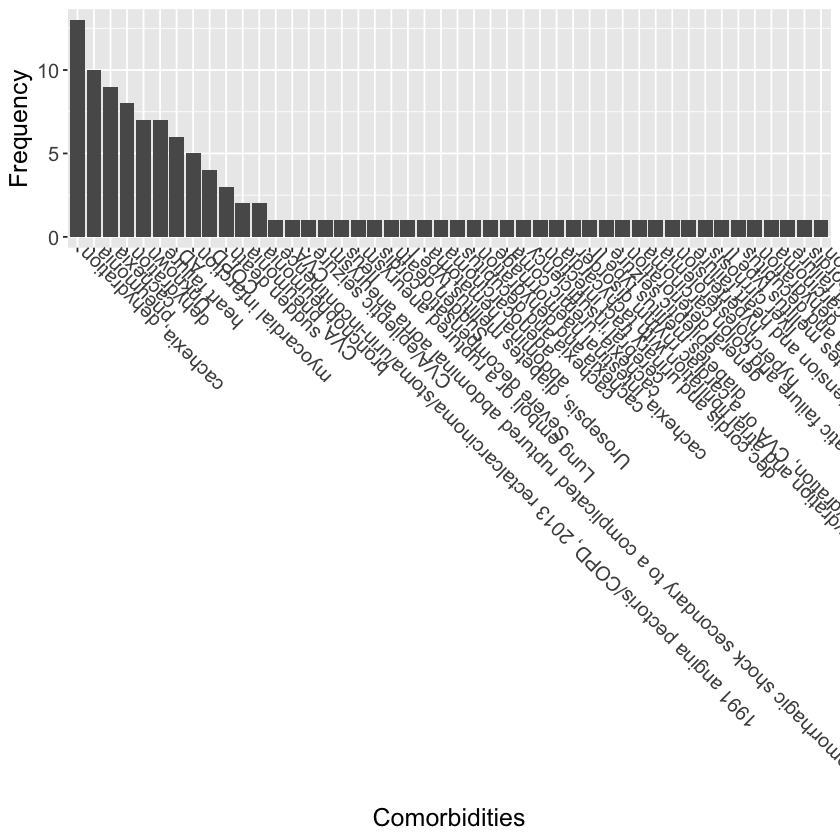

In [360]:
p<-ggplot(data=comorbodities_freq, aes(x=name, y=freq)) +
    geom_bar(stat="identity") +
    xlab("Comorbidities") + 
    ylab("Frequency") +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(angle = 135, hjust = 1)) 
p

In [58]:
save_plot("100_plus_plots/comorbidities_frequency_distribution.pdf", 
          p, base_height = 8, base_width = 12)

In [18]:
metadata$comorbidities <- sapply(metadata$nbb, function(x){
    if(x %in% clinical_data$`nbb with colour code`){
        return(clinical_data[which(clinical_data$`nbb with colour code` == x), ]$Comorbidities2)
    }
    else{
        NA
    }
})

In [19]:
metadata$has_cachexia <- grepl("cachexia", metadata$comorbidities, fixed = TRUE)
metadata$has_cachexia <- ifelse(metadata$has_cachexia, "cachexia", "not")

In [20]:
metadata$has_dehydration <- grepl("dehydration", metadata$comorbidities, fixed = TRUE)
metadata$has_dehydration <- ifelse(metadata$has_dehydration, "dehydration", "not")

In [21]:
metadata$has_pneumonia <- grepl("pneumonia", metadata$comorbidities, fixed = TRUE)
metadata$has_pneumonia <- ifelse(metadata$has_pneumonia, "pneumonia", "not")

In [22]:
metadata$has_heart <- grepl("heart failure", metadata$comorbidities, fixed = TRUE)
metadata$has_heart <- ifelse(metadata$has_heart, "heart_failure", "not")

In [23]:
metadata$has_Hypertension <- sapply(metadata$nbb, function(x){
    if(!(x %in% has_Hypertension_df$nbb)){
        return(NA)
    }
    else{
        return(has_Hypertension_df[which(has_Hypertension_df$nbb == x), ]$has_Hypertension)
    }

})

ERROR: Error in x %in% has_Hypertension_df$nbb: object 'has_Hypertension_df' not found


In [27]:
metadata[c("nbb", "filenames")]

,nbb,filenames
,<chr>,<chr>
121,2016-020,20190325_121_S16_020_CHC_011
125,2016-044,20190325_125_S16_044_CHC_007
127,2016-094,20190325_127_S16_094_CHC_004
16,2004-011,20190325_16_04_037_AD_008
182,2010-101,20190325_183_S10_292_AD_010
193,2002-024,20190325_194_S02_055_ND_005
31,2001-081,20190325_31_01_184_AD_006
57,1997-091,20190325_57_S97_235_AD_003
77,2011-072,20190325_77_S11_072_ND_012


In [28]:
pca <- prcomp(t(protein_intensity_combat), center = T, scale = T)
pca_plot <- data.frame(nbb = metadata$nbb,
                       x = pca$x[,1], y = pca$x[,2], 
                       GROUP = as.factor(metadata$GROUP))

In [30]:
save(pca_plot, file = "100_plus_project/Metadata/proteomics_pca_top2dim.Rdata")

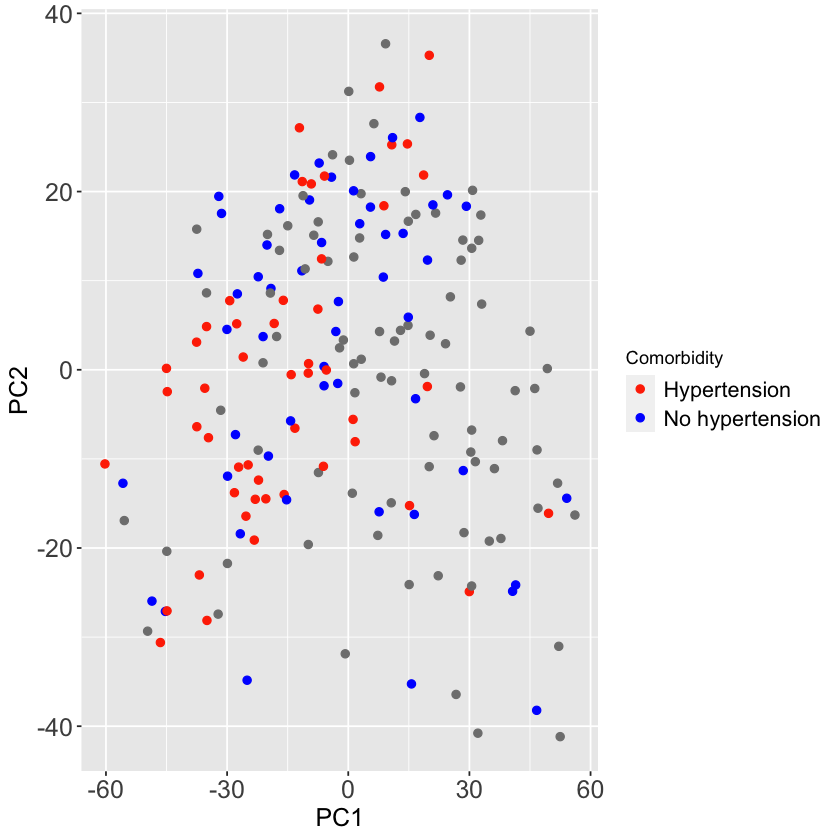

In [590]:
pca <- prcomp(t(protein_intensity_combat), center = T, scale = T)
pca_plot <- data.frame(x = pca$x[,1], y = pca$x[,2], 
                       col = as.factor(metadata$GROUP),
                       Comorbidity = metadata$has_Hypertension)
ggplot(pca_plot) + geom_point(aes(x=x, y=y, color=Comorbidity#, shape=Comorbidity
                                 ), size=2) +
    xlab("PC1") + 
    ylab("PC2") +

    scale_color_manual(name="Comorbidity", breaks = c("Hypertension", "No clinic data", "No hypertension"), 
                       values = c(color_AD, "grey", color_ND)#,
                       #labels = c("ND (n=40)",
                       #           "AD (n=28)", 
                       #           "CEN (n=56)")
                       )+

    theme(axis.title.x = element_text(size = 15),
          axis.title.y = element_text(size = 15),
          axis.text.x = element_text(size = 15),
          axis.text.y = element_text(size = 15),
          legend.text=element_text(size=13))

In [591]:
has_comorbidities <- which(!is.na(metadata$has_Hypertension))

In [592]:
length(has_comorbidities)

[1] 104

In [593]:
table(metadata[has_comorbidities, ]$GROUP, metadata[has_comorbidities, ]$has_Hypertension)

     
      Hypertension No hypertension
  AD             6              16
  CHC           28              21
  ND            16              17

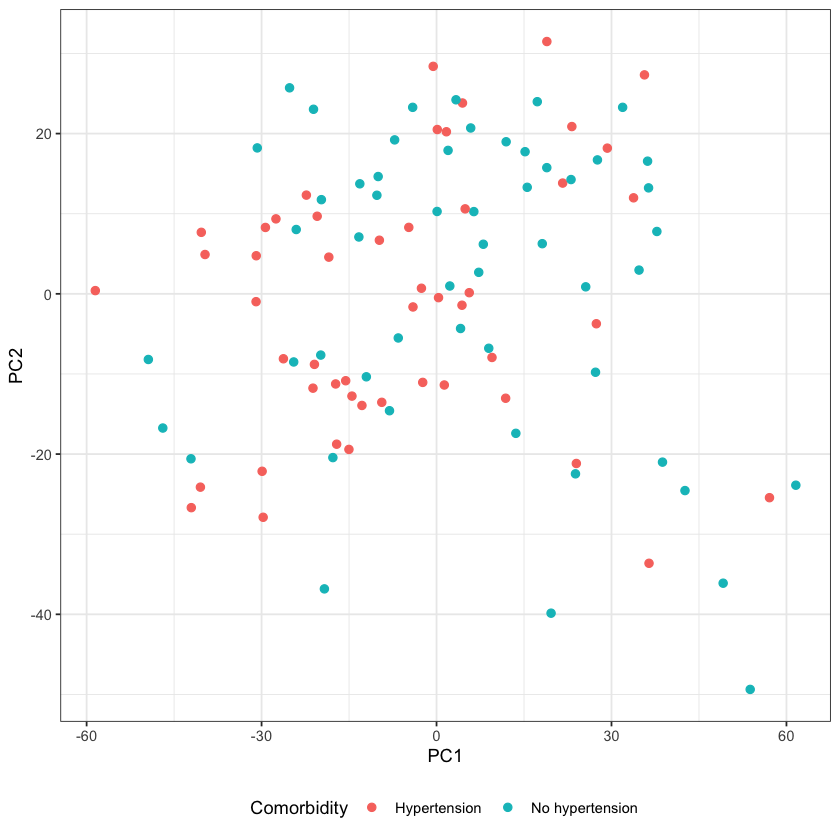

In [618]:
pca <- prcomp(t(protein_intensity_combat[, has_comorbidities]), center = T, scale = T)
pca_plot <- data.frame(x = pca$x[,1], y = pca$x[,2], 
                       col = as.factor(metadata[has_comorbidities, ]$GROUP),
                       Comorbidity = metadata[has_comorbidities, ]$has_Hypertension)
PCA_plot <- ggplot(pca_plot) + geom_point(aes(x=x, y=y, color=Comorbidity#, shape=Comorbidity
                                 ), size=2) +
    xlab("PC1") + 
    ylab("PC2") +
    theme(axis.title.x = element_text(size = 15),
          axis.title.y = element_text(size = 15),
          axis.text.x = element_text(size = 15),
          axis.text.y = element_text(size = 15),
          legend.text=element_text(size=13))+
    labs(color='Comorbidity') + #, shape = "Comorbidity") 
    theme_bw() +
    theme(legend.position = "bottom")
PCA_plot

In [619]:
save_plot("100_plus_plots/PCA_plot_for_hypertension_in_chronicDisease_people.pdf", 
          PCA_plot, base_height = 5, base_width = 5)

In [608]:
res.pca <- PCA(t(protein_intensity_combat[, has_comorbidities]), scale.unit = TRUE, graph = FALSE)

In [609]:
pdf("100_plus_plots/PCA_variances_for_hypertension_in_chronicDisease_people.pdf", width = 5, height = 5)
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))
dev.off()

pdf 
  2

In [597]:
metadata

,nbb,autopsy,sex,age,weight,GROUP,pmd,braak,amyloid,apoe,⋯,cBraak,O_amyloid,apoe_OR,pmd_numeric,comorbidities,has_cachexia,has_dehydration,has_pneumonia,has_heart,has_Hypertension
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
121,2016-020,S16/020,F,102,955,CHC,06:10,2,1,23,⋯,1,A,0.6,6.166667,NA,not,not,not,not,Hypertension
125,2016-044,S16/044,F,102,1015,CHC,05:17,3,3,33,⋯,2,C,1.0,5.283333,NA,not,not,not,not,No hypertension
127,2016-094,S16/094,F,104,1045,CHC,07:55,3,1,33,⋯,2,A,1.0,7.916667,NA,not,not,not,not,No hypertension
16,2004-011,04/037,F,84,1017,AD,05:55,5,3,33,⋯,3,C,1.0,5.916667,cachexia,cachexia,not,not,not,NA
182,2010-101,S10/292,M,64,1233,AD,04:35,6,3,32,⋯,3,C,0.6,4.583333,NA,not,not,not,not,No hypertension
193,2002-024,S02/055,F,75,1153,ND,05:30,1,3,42,⋯,1,C,2.6,5.500000,NA,not,not,not,not,NA
31,2001-081,01/184,F,93,1010,AD,05:05,5,3,33,⋯,3,C,1.0,5.083333,dehydration,not,dehydration,not,not,NA
57,1997-091,S97/235,F,85,1000,AD,02:00,5,3,43,⋯,3,C,3.2,2.000000,"cachexia, dehydration",cachexia,dehydration,not,not,NA
77,2011-072,S11/072,F,76,1072,ND,07:15,2,0,33,⋯,1,O,1.0,7.250000,heart failure,not,not,not,heart_failure,No hypertension


In [598]:
colnames(metadata)

[1] "nbb"              "autopsy"          "sex"              "age"             
 [5] "weight"           "GROUP"            "pmd"              "braak"           
 [9] "amyloid"          "apoe"             "filenames"        "fBraak"          
[13] "cBraak"           "O_amyloid"        "apoe_OR"          "pmd_numeric"     
[17] "comorbidities"    "has_cachexia"     "has_dehydration"  "has_pneumonia"   
[21] "has_heart"        "has_Hypertension"

In [599]:
metadata_variance_check <- metadata[c("age", "braak", "amyloid", 
                                      "has_Hypertension")]

In [600]:
colnames(metadata_variance_check) <- c("Age", "Braak", "Amyloid", "Has_hypertension")

In [601]:
form <- ~ Age + Braak + Amyloid + (1|Has_hypertension)

In [602]:
varPart <- fitExtractVarPartModel(protein_intensity_combat[, has_comorbidities], 
                                  form, metadata_variance_check[has_comorbidities, ])

vp <- sortCols(varPart)

Dividing work into 100 chunks...

Total:28 s


In [603]:
p_1 <- plotVarPart(vp, col = c('#F8766D', '#CD9600', '#7CAE00', '#00BE67', "grey85"))

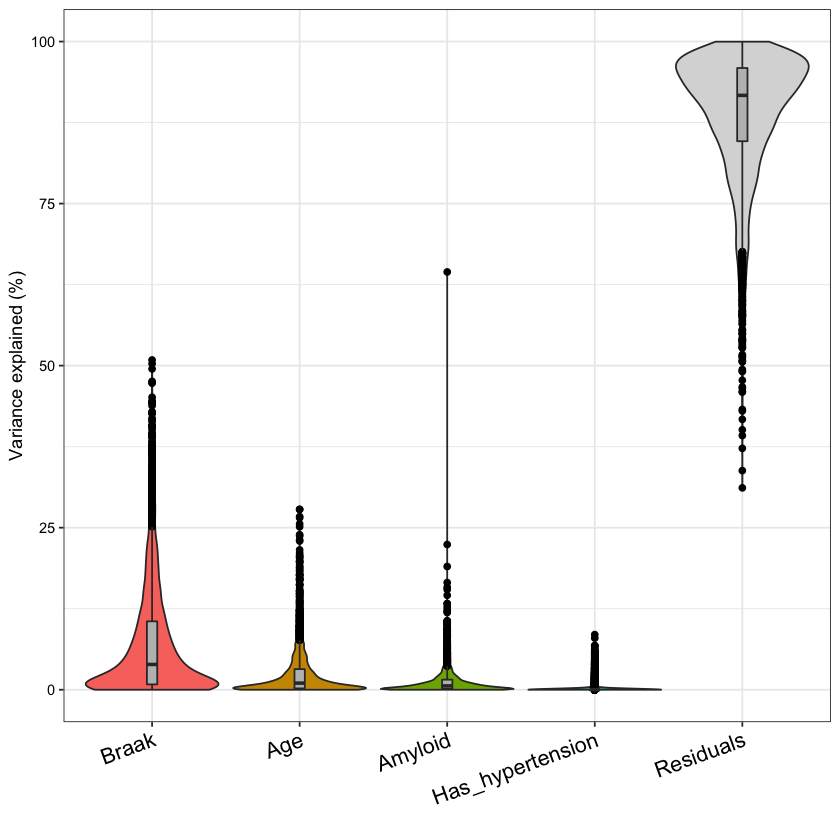

In [604]:
p_1

In [610]:
save_plot("100_plus_plots/variance_explained_for_hypertension_in_chronicDisease_people.pdf", 
          p_1, base_height = 5, base_width = 5)

In [141]:
load(file = "100_plus_results/Sig_results_from_analysis/CEN-specific_Age-related_proteins_in_8clusters.Rdata")

In [142]:
protein_clust

protein,clust,gene,HUGO_gene,celltype
<fct>,<dbl>,<chr>,<chr>,<chr>
CARNS1,5,CARNS1,CARNS1,Oligodendrocytes
MAP1B,8,MAP1B,MAP1B,NA
IRGQ,8,IRGQ,IRGQ,NA
SHANK2,8,SHANK2,SHANK2,NA
HADHA,10,HADHA,HADHA,NA
RPS6KA2;RPS6KA3,2,RPS6KA2,RPS6KA2,NA
CIT,3,CIT,CIT,NA
RPS3,6,RPS3,RPS3,NA
TPD52L1,4,TPD52L1,TPD52L1,Astrocytes


In [144]:
protein_intensity_combat_Age108 <- protein_intensity_combat[which(rownames(protein_intensity_combat) %in% protein_clust$protein), ]

In [145]:
protein_intensity_combat_Age108

,intensity_20190325_121_S16_020_CHC_011,intensity_20190325_125_S16_044_CHC_007,intensity_20190325_127_S16_094_CHC_004,intensity_20190325_16_04_037_AD_008,intensity_20190325_183_S10_292_AD_010,intensity_20190325_194_S02_055_ND_005,intensity_20190325_31_01_184_AD_006,intensity_20190325_57_S97_235_AD_003,intensity_20190325_77_S11_072_ND_012,intensity_20190325_79_S07_308_ND_009,⋯,intensity_20190507_21_01_032_AD_221,intensity_20190507_27_00_204_AD_211,intensity_20190507_29_S99_240_AD_219,intensity_20190507_30_S05_040_AD_209,intensity_20190507_63_04_027_AD_217,intensity_20190507_72_S99_219_AD_213,intensity_20190606_106_NABCA14_08_ND_RERUN,intensity_20190606_140_2017_027_CHC_RERUN,intensity_20190606_20_S00_166_AD_RERUN,intensity_20190606_9_S93_025_AD_RERUN
CARNS1,5.214262,6.485597,6.855188,4.821086,8.051261,6.893927,6.873825,7.038296,5.513223,6.432737,⋯,5.769251,7.364321,5.596068,5.102724,7.062244,5.900433,6.647769,7.206671,6.828433,7.024894
MAP1B,13.818739,14.046190,14.009469,13.489549,13.414729,14.047438,13.346392,13.582852,13.327504,13.669150,⋯,13.448257,13.619563,13.524802,13.573349,13.567347,13.668256,13.982783,13.891791,13.865582,13.691483
IRGQ,8.734155,8.689128,8.713197,8.348451,7.818547,8.723143,7.939641,7.849955,8.661529,8.562611,⋯,8.306760,7.939098,8.100019,8.088486,7.885316,8.190717,8.546807,8.646515,8.257606,7.981196
SHANK2,8.495442,8.266875,7.918087,7.858991,7.182211,8.611868,7.525060,7.665959,7.780354,7.816888,⋯,7.604111,7.526025,7.856375,8.217271,7.575273,7.644814,7.928374,8.119638,8.238712,8.265357
HADHA,11.895305,12.198673,11.825372,11.851752,12.238342,11.993591,12.350849,11.878284,11.678639,12.017937,⋯,12.064492,12.312240,12.244147,11.728011,12.184121,12.146464,12.175315,11.982294,11.767624,12.247139
RPS6KA2;RPS6KA3,7.459233,7.559887,7.428956,7.746758,7.925907,7.227122,8.109857,7.922242,7.328302,7.324754,⋯,7.867806,7.950033,7.991960,7.963438,7.959588,7.879924,7.408853,7.626518,7.520554,7.832276
CIT,10.051638,10.030699,9.458719,10.104790,9.607512,10.095150,9.842404,9.837792,10.210954,9.767791,⋯,10.014501,9.659523,10.293467,10.170360,9.613356,9.773794,9.669535,9.425165,10.086101,9.826916
RPS3,12.458031,12.423760,12.558893,12.144775,12.033169,12.444242,12.158696,12.237792,12.351000,12.353954,⋯,12.488852,12.367493,12.226135,12.416201,12.354048,12.448655,12.455142,12.520220,12.322318,12.202594
TPD52L1,7.327239,7.178463,6.672168,6.688064,6.427147,6.197189,7.733199,7.140889,6.379822,6.946652,⋯,6.961358,6.747014,7.454159,7.113051,7.101779,6.718234,6.470039,6.384342,6.407629,6.879112
RALA,10.475220,10.599386,10.786633,10.332731,10.476610,10.521415,10.512848,10.300469,10.375603,10.778957,⋯,10.676013,10.600578,10.365289,10.358652,10.595659,10.510142,10.625131,10.588011,10.619411,10.317118


In [ ]:
AD_index <- which(metadata$GROUP == "AD")

In [149]:
varPart <- fitExtractVarPartModel(protein_intensity_combat_Age108[, -AD_index], 
                                  form, metadata_variance_check[-AD_index, ])

vp <- sortCols(varPart)

Dividing work into 100 chunks...

Total:3 s


In [150]:
p_1 <- plotVarPart(vp, col = c('#F8766D', '#CD9600', '#7CAE00', '#00BE67', '#00BFC4', '#00A9FF', '#C77CFF', "grey85"))

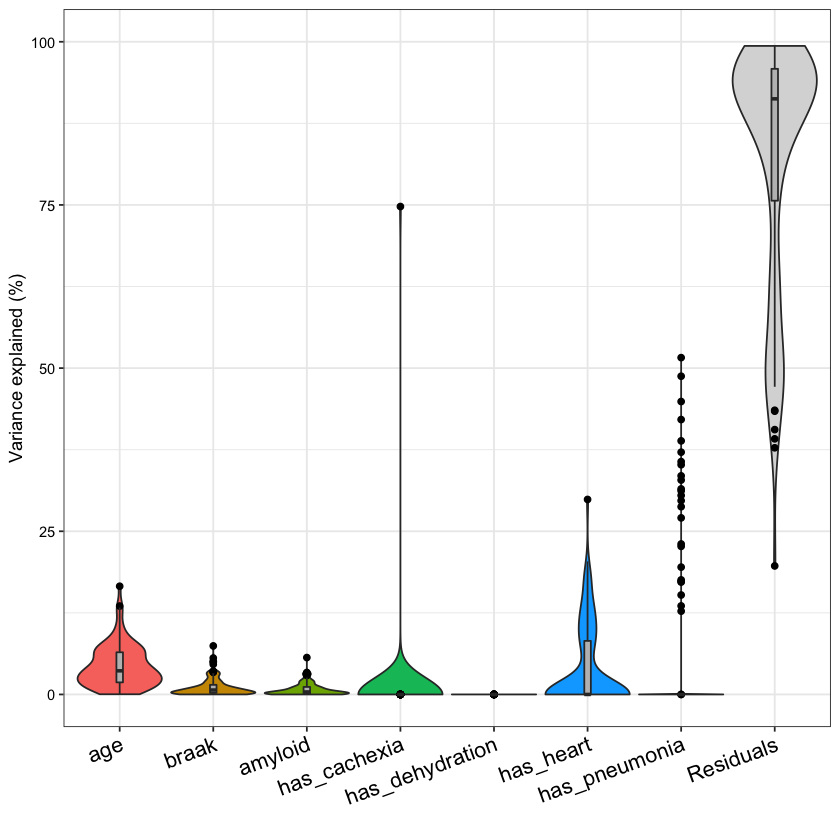

In [151]:
p_1

In [67]:
Braak_test_index <- which((metadata$GROUP != "CHC"))
length(Braak_test_index)

protein_intensity_combat_nonlog <- 2^protein_intensity_combat

[1] 141

### Prepare data table for proteomics paper 

In [74]:
pathology_related_proteins_ANOVA <- cbind(rownames(pathology_related_proteins_ANOVA), 
                                          pathology_related_proteins_ANOVA)

colnames(pathology_related_proteins_ANOVA) <- c("Protein_name", "ANOVA_p_value", "ANOVA_FDR", 
                                                "LFC", "Gene")
pathology_related_proteins_ANOVA <- pathology_related_proteins_ANOVA[, c(1, 5, 2:4)]

pathology_related_proteins_ANOVA$ANOVA_top20_p <- "no"
pathology_related_proteins_ANOVA[c(top_down_ANOVA_p, top_up_ANOVA_p), ]$ANOVA_top20_p <- "yes"

pathology_related_proteins_ANOVA$ANOVA_top20_LFC <- "no"
pathology_related_proteins_ANOVA[c(top_down_ANOVA_lfc, top_up_ANOVA_lfc), ]$ANOVA_top20_LFC <- "yes"

pathology_related_proteins_ANOVA$Significant_in_assumption1 <- "no"
pathology_related_proteins_ANOVA[c(top_down_ANOVA, top_up_ANOVA), ]$Significant_in_assumption1 <- "yes"

In [75]:
pathology_related_proteins_lm <- cbind(rownames(pathology_related_proteins_lm), 
                                       pathology_related_proteins_lm)

colnames(pathology_related_proteins_lm) <- c("Protein name", "Linear_effect_size", "Linear_p_value", 
                                             "Linear_FDR", "Gene")

pathology_related_proteins_lm$Linear_top20_p <- "no"
pathology_related_proteins_lm[c(top_down_lm_p, top_up_lm_p), ]$Linear_top20_p <- "yes"

pathology_related_proteins_lm$Linear_top20_effect_size <- "no"
pathology_related_proteins_lm[c(top_down_lm_lfc, top_up_lm_lfc), ]$Linear_top20_effect_size <- "yes"

pathology_related_proteins_lm$Significant_in_assumption2 <- "no"
pathology_related_proteins_lm[c(top_down_lm, top_up_lm), ]$Significant_in_assumption2 <- "yes"

In [76]:
Braak_stage_related_proteins <- cbind(pathology_related_proteins_ANOVA, pathology_related_proteins_lm[-c(1, 5)])

In [77]:
write.table(Braak_stage_related_proteins[sig_index, ], 
            file = "100_plus_results/Results_for_paper_supplementary/Amyloid_stage_related_proteins_two_assumptions.tsv",
            row.names = FALSE, quote = FALSE, sep = "\t")

In [78]:
write.xlsx(Braak_stage_related_proteins[sig_index, ], 
           file = "100_plus_results/Results_for_paper_supplementary/Amyloid_stage_related_proteins_two_assumptions.xlsx",
           sheetName = "Sheet1",
           col.names = TRUE,
           row.names = FALSE)

#### Prepare data table for proteomics paper

In [79]:
protein_list_basicInfo <- pathology_related_proteins_ANOVA[c(1, 2)]

In [82]:
protein_list_unique_Amyloid <- protein_list_basicInfo[which(!(sig_index %in% sig_index_Braak)), ]
protein_list_unique_Braak <- protein_list_basicInfo[which(!(sig_index_Braak %in% sig_index)), ]

In [83]:
write.xlsx(protein_list_unique_Amyloid, 
           file = "100_plus_results/Results_for_paper_supplementary/Unique_Amyloid_stage_related_proteins.xlsx",
           sheetName = "Sheet1",
           col.names = TRUE,
           row.names = FALSE)

### Test the confounding of comorbidities - chronic disease

In [23]:
clinical_data_new <- read_excel("100_plus_project/Metadata/2020_10_12_Proteomics_Metadata_forMeng_20240627.xlsx",
                            sheet=1, col_names=TRUE, na="NA")

New names:
• `autopsy` -> `autopsy...3`
• `GROUP` -> `GROUP...4`
• `Snumber` -> `Snumber...8`
• `Snumber` -> `Snumber...16`
• `GROUP` -> `GROUP...17`
• `tissuecode` -> `tissuecode...19`
• `autopsy` -> `autopsy...22`
• `braak` -> `braak...25`
• `amyloid` -> `amyloid...26`
• `braaklb` -> `braaklb...27`
• `tissuecode` -> `tissuecode...35`
• `Cause of death` -> `Cause of death...51`
• `braak` -> `braak...52`
• `amyloid` -> `amyloid...53`
• `braaklb` -> `braaklb...54`
• `Cause of death` -> `Cause of death...58`

In [24]:
clinical_data_new <- clinical_data_new[1:222,]

In [25]:
clinical_data_new

nbb with colour code,nbb,autopsy...3,GROUP...4,ABG,sampleprepRandomization (4 batches),IHC order,Snumber...8,zmRandomization (10 batches),Mass-Spec filenames (1),⋯,Hip sclerosis,Congophilic/neuritic plaques,CERAD,CAA info,CAA,TDP,GVD,ARTAG,Amygdala notes,Amy NFT/SP
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
777,777,NABCA14-08,ND,ABG,115,106,NABCA14-08,58,20190401_106_NABCA14_08_ND_058,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
797,797,NABCA15-03,ND,ABG,31,107,NABCA15-03,204,20190502_107_NABCA15_03_ND_204,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
859,859,NABCA15-08,ND,ABG,24,108,NABCA15-08,28,20190328_108_NABCA15_08_ND_028,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
880,880,NABCA16-01,ND,ABG,80,109,NABCA16-01,140,20190419_109_NABCA16_01_ND_140,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
889,889,NABCA16-02,ND,ABG,93,110,NABCA16-02,210,20190507_110_NABCA16_02_ND_210,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1993-014,1993-014,S93/025,AD,ABG,149,9,S93/025,57,20190401_9_S93_025_AD_057,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1995-066,1995-066,S95/162,AD,ABG,222,55,S95/162,171,20190424_55_S95_162_AD_171,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1996-035,1996-035,S96/092,AD,ABG,184,25,S96/092,109,20190416_25_S96_092_AD_109,⋯,NA,"CP: many F, few T, Hip, Par, Occ",3,y (2? Few occ and hip),1,NA,NA,NA,NA,NA
1997-015,1997-015,S97/045,AD,ABG,2,56,S97/045,76,20190412_56_S97_045_AD_076,⋯,NA,"subst. F, Par, few Occ, Amy",2,"y, Occ substantial number of ca.",2,NA,NA,NA,Amygdala severely disrupted,NA


In [26]:
colnames(clinical_data_new)

[1] "nbb with colour code"                "nbb"                                
 [3] "autopsy...3"                         "GROUP...4"                          
 [5] "ABG"                                 "sampleprepRandomization (4 batches)"
 [7] "IHC order"                           "Snumber...8"                        
 [9] "zmRandomization (10 batches)"        "Mass-Spec filenames (1)"            
[11] "Mass-Spec filenames (2)"             "IHC nr"                             
[13] "Autopsy nr"                          "Diagnosis"                          
[15] "Date LCM"                            "Snumber...16"                       
[17] "GROUP...17"                          "IHC numbering"                      
[19] "tissuecode...19"                     "LCM slides"                         
[21] "LCM finished"                        "autopsy...22"                       
[23] "sex"                                 "age"                                
[25] "braak...25"                          "amyloid...26"                       
[27] "braaklb...27"                        "pmd"                                
[29] "ph"                                  "weight"                             
[31] "csf"                                 "apoe"                               
[33] "barcode"                             "id"                                 
[35] "tissuecode...35"                     "iduit"                              
[37] "datumuit"                            "uitvraag"                           
[39] "recipient"                           "clin. diagn."                       
[41] "dcode"                               "diagnosis"                          
[43] "dcodewk"                             "wcode"                              
[45] "region"                              "specific"                           
[47] "ocode"                               "storage"                            
[49] "freezer"                             "Clincal info"                       
[51] "Cause of death...51"                 "braak...52"                         
[53] "amyloid...53"                        "braaklb...54"                       
[55] "new info extraction 2024"            "chronic diseases"                   
[57] "general Note to brain"               "Cause of death...58"                
[59] "Atrophy"                             "Atherosclerosis"                    
[61] "Infarcts"                            "Lewy bodies"                        
[63] "Amyloid"                             "Braak"                              
[65] "ABC"                                 "Hip sclerosis"                      
[67] "Congophilic/neuritic plaques"        "CERAD"                              
[69] "CAA info"                            "CAA"                                
[71] "TDP"                                 "GVD"                                
[73] "ARTAG"                               "Amygdala notes"                     
[75] "Amy NFT/SP"

In [27]:
clinical_data_new$Year <- sapply(clinical_data_new$nbb, function(x){
    return(as.numeric(str_split(x, "-")[[1]][1]))
})

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

In [28]:
clinical_data_new_2005 <- subset(clinical_data_new, !is.na(Year)&(Year > 2005))

In [29]:
dim(clinical_data_new_2005)

[1] 128  76

In [30]:
clinical_data_new_2005 <- clinical_data_new_2005[-which(duplicated(clinical_data_new_2005$nbb)), ]

In [31]:
dim(clinical_data_new_2005)

[1] 122  76

In [32]:
chronic_disease_list <- lapply(clinical_data_new_2005$"chronic diseases", function(x){
    if(is.na(x)){
        return(list())
    }
    else{
        disease_list <- lapply(str_split(x, "\r\n")[[1]], function(y){
            disease <- str_split(y, fixed('('))[[1]][1]
            disease <- gsub("^\\s+|\\s+$", "", disease)
            return(disease)
        }) 
        
    }
})

In [33]:
length(chronic_disease_list)

[1] 122

In [34]:
chronic_disease_all <- NULL
for(i in chronic_disease_list){
    if(length(i) == 0){
        next
    }
    else{
        chronic_disease_all <- c(chronic_disease_all, unlist(i))
    }
}

In [35]:
comorbodities_freq <- table(chronic_disease_all) %>% data.frame()

In [36]:
colnames(comorbodities_freq) <- c("name", "freq")

In [37]:
comorbodities_freq <- comorbodities_freq[order(comorbodities_freq$freq, decreasing = TRUE), ]

In [38]:
comorbodities_freq

,name,freq
,<fct>,<int>
426,Hypertension,59
833,Urinary tract infection,32
645,Presbyacusis,28
137,Cataract,27
382,Heart failure,24
627,Pneumonia,20
225,Constipation,19
42,Appendectomy,17
587,Osteoporosis,17


In [39]:
comorbodities_freq_cut <- subset(comorbodities_freq, (name != 'Alzheimer\'s disease' )&(freq > 3))

In [524]:
comorbodities_freq_cut$name <- factor(comorbodities_freq_cut$name, levels = rev(comorbodities_freq_cut$name))

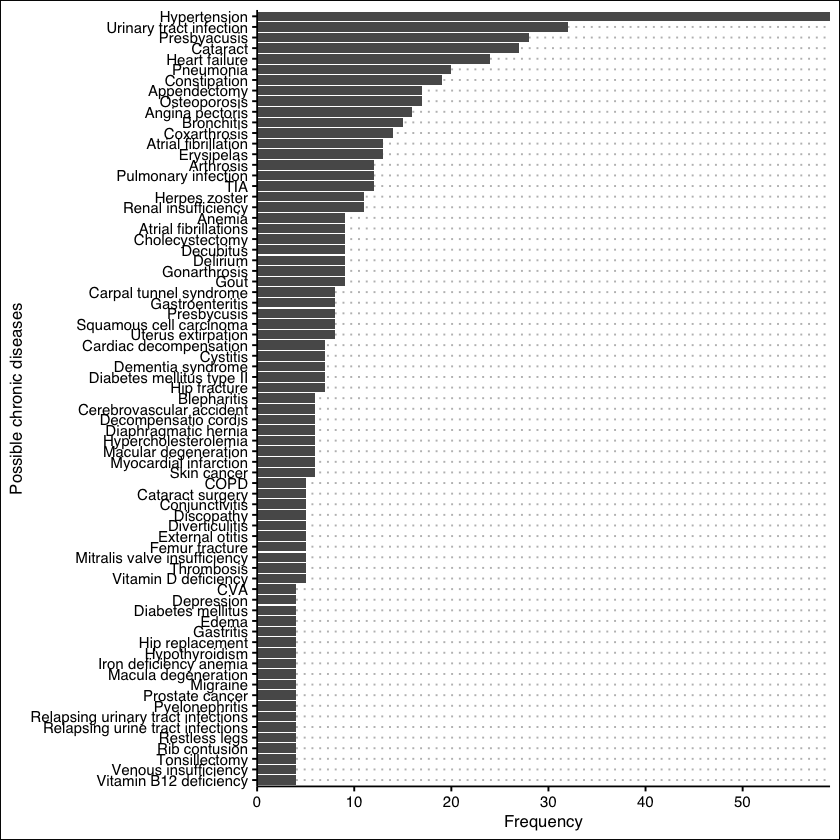

In [525]:
p<-ggplot(data=comorbodities_freq_cut, aes(x=freq, y=name)) +
    geom_bar(stat="identity") +
    ylab("Possible chronic diseases") + 
    xlab("Frequency") +
    scale_x_continuous(expand = expansion(mult = c(0, 0))) +
    theme_clean()
p

In [526]:
save_plot("100_plus_plots/chronic_disease_frequency_distribution.pdf", 
          p, base_height = 9, base_width = 5)

In [527]:
#include_for_agecontinuum <- NULL
#for(i in chronic_disease_list){
#    if((i %in% comorbodities_freq_cut$name) %>% any()){
#        include_for_agecontinuum <- c(include_for_agecontinuum, TRUE)
#    }
#    else{
#        include_for_agecontinuum <- c(include_for_agecontinuum, FALSE)
#    }
#}

In [528]:
#age_continuum_df <- clinical_data_new_2005[which(include_for_agecontinuum), c("nbb", "GROUP...4", "age")]

In [529]:
age_continuum_df <- clinical_data_new_2005[c("nbb", "GROUP...4", "age")]

In [530]:
colnames(age_continuum_df) <- c("nbb", "GROUP", "age")

In [531]:
age_continuum_df$age <- as.numeric(age_continuum_df$age)

In [533]:
age_continuum_df$GROUP <- factor(age_continuum_df$GROUP, levels = c("AD", "ND", "CHC"))

In [534]:
table(age_continuum_df$GROUP)


 AD  ND CHC 
 23  41  58 

In [535]:
insert_minor <- function(major_labs, n_minor) {labs <- 
                              c( sapply( major_labs, function(x) c(x, rep("", 4) ) ) )
                              labs[1:(length(labs)-n_minor)]}

Warning message:
“Removed 4 rows containing missing values (geom_bar).”

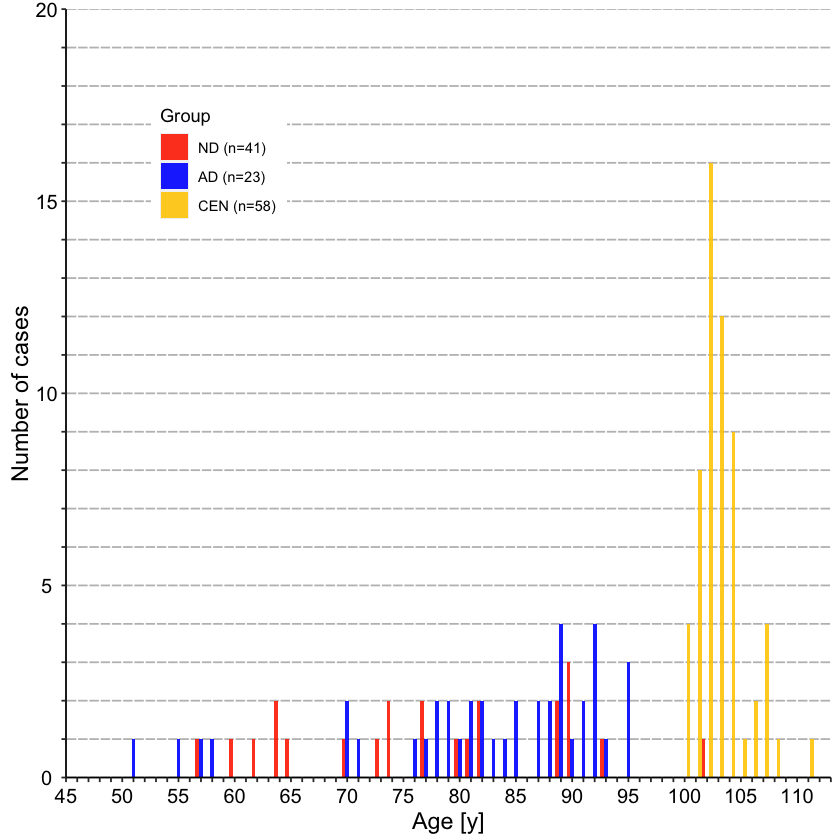

In [548]:
#jpeg(file="100_plus_plots/age_distribution_3groups.jpg", width=600*5, height=300*5, res=72*5)
p <- ggplot(age_continuum_df, aes(x=age, fill=GROUP)) + 
    geom_histogram(binwidth=1, alpha=0.9, position="dodge") +
    xlab("Age [y]") + ylab("Number of cases") +
    scale_x_continuous(limits = c(45, 113), breaks=seq(45, 115, 1), 
                       labels = insert_minor(seq(45, 115, 5), 4 ),
                       expand = c(0, 0)) +
    scale_y_continuous(limits = c(0, 20), breaks=seq(0, 20, 1), 
                       labels=insert_minor(seq(0, 20, 5), 4 ),
                       expand = c(0, 0)) +
    scale_fill_manual(name="Group", breaks = c("AD", "ND", "CHC"), 
                       values = c(color_AD, color_ND, color_CHC_M),
                       labels = c("ND (n=41)",
                                  "AD (n=23)", 
                                  "CEN (n=58)")
                       )+
    theme(#plot.background = element_rect(),    # Background of the entire plot
          panel.background = element_rect(fill = "white"),   # Background of plotting area
          #panel.border = element_rect(),       # Border around plotting area.
                                               # fill argument should be NA
  
          #panel.grid = element_line(),         # All grid lines
          #panel.grid.major = element_line(),   # Major grid lines
          #panel.grid.minor = element_line(),   # Minor grid lines
        
          #plot.margin = ggplot2::margin(0.1, 0.5, 0.5, 0.5, "cm"),
          legend.position = c(0.2, 0.8),
  
          panel.grid.major.x = element_line(), # Vertical major grid lines
          panel.grid.major.y = element_line(size = 0.5, linetype = 'solid',
                                            color = "gray"), # Horizontal major grid lines
          #panel.grid.minor.x = element_line(), # Vertical minor grid lines
          #panel.grid.minor.y = element_line(size = 0.5, linetype = 'solid',
          #                      color = "gray"),  # Vertical major grid lines
        
          plot.title = element_text(face = "bold", colour = "black", 
                                    size = font_size+font_size_add*2#, hjust = -0.08
                                   ),
        
          axis.title.x = element_text(color = "black", size = font_size+font_size_add * 2,
                                      vjust = 0.5, hjust = 0.5),
          axis.title.y = element_text(color = "black", size = font_size+font_size_add * 2,
                                      vjust = 0.5, hjust = 0.5),

          axis.text.x = element_text(size = font_size+font_size_add, color = "black", 
                                     vjust = 0.5, hjust = 0.5),
          axis.text.y = element_text(size = font_size+font_size_add, color = "black",
                                     vjust = 0.5, hjust = 0.5),
          
          axis.line = element_line(size = 0.5, linetype = "solid",
                                   colour = "black")
         )
p

#dev.off()

In [549]:
save_plot("100_plus_plots/age_continuum_distribution_with_chronic_disease.pdf", 
          p, base_height = 3.5, base_width = 9)

Warning message:
“Removed 4 rows containing missing values (geom_bar).”

In [550]:
has_Hypertension <- NULL
for(i in chronic_disease_list){
    if(length(i) == 0){
        has_Hypertension <- c(has_Hypertension, "No clinic data")
    }
    else{
        if("Hypertension" %in% i){
            has_Hypertension <- c(has_Hypertension, "Hypertension")
        }
        else{
            has_Hypertension <- c(has_Hypertension, "No hypertension")
        }
    }
}

In [551]:
table(has_Hypertension)

has_Hypertension
   Hypertension No hypertension 
             58              64 

In [586]:
has_Hypertension_df <- data.frame(nbb = clinical_data_new_2005$nbb, has_Hypertension = has_Hypertension, 
                                  stringsAsFactors = FALSE)

In [587]:
has_Hypertension_df

nbb,has_Hypertension
<chr>,<chr>
2006-005,No hypertension
2006-010,Hypertension
2006-056,Hypertension
2006-079,Hypertension
2006-080,Hypertension
2007-009,No hypertension
2007-027,No hypertension
2007-059,No hypertension
2007-063,Hypertension
